# Lecture 1 and 2: Introduction

## Structure of the course

This course consists of the following three Sections:

1. Parabolic PDEs
2. Hyperblic PDEs
3. Elliptic PDEs


## What is a Partial Differential Equation (PDE)?
We give the term/acronym PDE a meaning by the following

#### Definition. <em> (Partial Differential Equation)</em>
<em>Equations which contain the partial derivatives of a function 
$ u(x,y)\,:\,\mathbb{R}^2\to\mathbb{R}$ are called $\texttt{Partial Differential Equations}$ (PDEs):</em>

$$
F\Bigl(
		x,y,u,\frac{\partial u}{\partial x},\frac{\partial u}{\partial y},\frac{\partial u}{\partial x\partial y}
	\Bigr)
	= 0
	\,.
$$

#### Examples:
1. Laplace equation in 1D
$$\Delta u = u_{xx} = 0\,.$$
2. Laplace equation in 2D
$$\Delta u = u_{xx}+u_{yy} = 0\,.$$
3. Heat equation
$$u_t-a\Delta u = f\,,$$
where $a$ is the material's heat conductivity and $f$ is a heat source/sink.
4. Linear transport equation in 1D
$$u_t+cu_x=0$$
5. Wave equation in 1D
$$u_{tt}-c^2u_{xx}=0$$

## Classification of PDEs

#### Definition. <em>(Classification of PDEs)</em>
<em> A linear PDE in two variables $(x,y)$ of the form 

$
a(x,y)u_{xx}+2b(x,y)u_{x,y}+c(x,y)u_{yy}+d(x,y)u_x
	+e(x,y)u_y+f(x,y)u=g\,,
$

is called 

i) $\texttt{elliptic}$ in $(x,y)\in\Omega$, if $ac-b^2>0$, 

ii) $\texttt{hyperbolic}$ in $ (x,y)\in\Omega$, if $ac-b^2<0$,

iii) $\texttt{parabolic}$ in $ (x,y)\in\Omega$, if $ac-b^2=0$.

The above linear PDE is $\texttt{elliptic (hyperbolic, parabolic)}$ if it is 
$\texttt{elliptic (hyperbolic, parabolic)}$ for all $(x,y)\in\Omega$.
</em>

#### Exercise: <em>(Classify PDEs)</em>
Look at the examples 1.-5. above and decide to which class of PDE each example belongs. 
[Note that the heat equation (Example 3.) is to be considered in one space dimension such that it becomes an equation for the two variables $(t,x)$.]

## Finite Difference Method for parabolic PDEs

Let us discretize both time and space as follows:

$$t_n = n \Delta t,~ n = 0, \ldots, N-1,$$

$$x_j = j \Delta x,~ j = 0, \ldots, J-1,$$

where $N$ and $J$ are the number of discrete time and space points in our grid respectively.
$\Delta t(=k)$ and $\Delta x(=h)$ are the time step and space step respectively and defined as follows:

$$\Delta t = T / N,$$

$$\Delta x = L / J,$$

where $T$ is the point in time up to which we will integrate $u$ numerically.

<!-- PDF and SVG files could not be loaded via a direct download link 
from Google Drive but PNG files -->

![PNG google fdmesh](https://drive.google.com/uc?export=download&id=0B06kMZvjJTVnb21RcFhtLVlFeUE)

<!-- Not working PDF and SVG loads:

![PDF google fdmesh](https://drive.google.com/uc?export=download&id=0B06kMZvjJTVneV9Yekhsam96dEk)

![SVG google fdmesh](https://drive.google.com/uc?export=download&id=0B06kMZvjJTVnNGRuazk0ZnpJb1k)

-->

Next, we show how to define a grid in Python using Python libraries 
such as [NumPy](http://www.numpy.org/) 
and [pyplot](http://matplotlib.org/api/pyplot_api.html).

In [25]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Physical parameters:

In [26]:
a=0.3         # diffusion constant

#### Specify spatial grid in Python:

In [27]:
L = 1.                                          # length of domain
J = 41                                          # number of grid points
dx = float(L)/float(J-1)                        # mesh size h = dx
#x_grid = np.array([j*dx for j in range(J)])   # spatial grid points
x_grid = np.linspace(0,1.0,J)                    # 

#### Specify temporal grid in Python:

In [28]:
T = 1.                                       # length of time
N = 20                                       # number of time steps
#dt = float(T)/float(N-1)                    # time step size
sigma = .4  # stability if a dt/dx <= 1/2  ==>  dt <= dx**2/(2*a)
            # hence, sigma < 0.5
dt = sigma*dx**2/a                      # stability: dt <= dx**2/(2*a)

## Goal: <em>(Compute discrete approximations $U^n_j$)</em>
To construct a numerical method, which gives a unique discrete solutions $U^n_j:=U(x_j,t_n)$, that reliably approximates 
the unknonwn analytic solution $u(x,t)$ solution of the general 
heat equation

$$
u_t(x,t) - au_{xx}(x,t) = f(x,t)
$$

in the discrete grid points $(x_j,t_n)$, $n=0,\ldots,N-1$, 
$j=0,\ldots,J-1$. The function $f(x,t)$ is an external heat 
source/sink and $a=const.$ the heat conductivity.

Mathematically, one is generally interested in quantifying the error 
pointwise error $u(x_j,t_n) - U^n_j$ or with respect to a suitable 
norm $\|\cdot\|_e$, i.e.,

$$
\| u(x_j,t_n) - U^n_j \|_e\,.
$$

### Step 1: Approximation of the differential operators

#### Definition. <em>(Three fundamental finite differences)</em> 
<em> One defines a

(a) <strong>''forward difference''</strong> operator by 
$$
D^+_x U^n_j :=\frac{F U^n_j}{h} :=\frac{ U_{j+1}^n - U_j^n}{h}\,,
$$
(b) <strong>''backward difference''</strong> operator by 
$$
D_x^-U_j^n := \frac{B U^n_j}{h} :=\frac{U_{j}^n-U_{j-1}^n}{h}\,,
$$
(c) <strong>''central difference''</strong> operator by
$$
D_x^0 U_j^n := \frac{D U^n_j}{{\color{red} 2}h} :=\frac{U_{j+1}^n-U_{j-1}^n}{{\color{red} 2}h}\,,
$$
(d) and a <strong>''second central difference''</strong> operator by
$$
D_x^2 U_j^n := \frac{D^+_x U_j^n - D^-_x U_j^n}{h} := \frac{\delta_{x_j}^2 U^n_j}{{\color{red} h^2}}
:= \frac{U_{j+1}^n-2U_j^n+U_{j-1}^n}{{\color{red} h^2}}\,.
$$
</em>

#### Approximate $u_t$:
Applying the forward difference $D^+_t$ to approximate $u_t$ in grid point $(j,n)$, we use the values of $U$ in two specific grid points:

$$u_t\Bigg|_{x = j \Delta x, t = n \Delta t}=\frac{\partial u}{\partial t}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx 
D^+_t f(t) = \frac{U_j^{n+1} - U_j^n}{\Delta t}.$$

##### Quantifying approximation $D_t^+ U^n_j$ with exact solution $u(x_j,t_n)$:
After applying the Taylor expansion to a funtion $f(t)$ around $t\in\mathbb{R}$, i.e., for $k>0$ small it holds that

$$
f(t+k) = f(t) + f'(t)k + \frac{1}{2}f''(t)k^2 + \text{h.o.t.}\,,
$$

where $\text{h.o.t.}$ stands for <em>higher order terms</em>, we can write 
the forward difference $D_t^+f(t)$ as follows

$$
D^+_t f(t) \approx f'(t) + \frac{1}{2}f''(t)k + {\cal O}(k^2)\,.
$$

Similarly, it holds that 

$$
D^-_t f(t) \approx f'(t) - \frac{1}{2}f''(t)k + {\cal O}(k^2)\,.
$$

#### Approximate $u_{xx}$:
Applying the second central difference $D^2_x$ to approximate $u_xx$ 
in grid point $(j,n)$, we use the values of $U$ as follows

$$\frac{\partial^2 u}{\partial x^2}\Bigg|_{x = x_j, t = t_n} 
\approx D^2_x U^n_j
= \frac{U_{j+1}^n-2U_j^n+U_{j-1}^n}{{h^2}}
$$

##### Quantifying approximation $D_x^2 U^n_j$ with exact solution $u(x_j,t_n)$:


$$
D^2_x U^n_j = \frac{D^+_x U_j^n - D^-_x U_j^n}{h} 
\approx \frac{[u_x(x_j,t_n)+\frac{1}{2}u_{xx}(x_j,t_n)h+\ldots] - [u_x(x_j,t_n)-\frac{1}{2}u_{xx}(x_j,t_n)h+\ldots]}{h} 
= u_{xx} + {\cal O}(h^2)\,.
$$

### Step 2: Putting the discrete operators $D_t^+$ and $D^2_x$ together

With the discrete differential operators $D_t^+$ and $D^2_x$, 
the 1D diffusion equation turns into the following numerical scheme:
   
$$
U_{j}^{n+1}=U_{j}^{n}+\frac{ak}{h^2}(U_{j+1}^{n}-2U_{j}^{n}+U_{j-1}^{n})
$$

### Step 3: Initial and boundary conditions

We choose an initial condition defined as follows,

\begin{equation}
u(x,0)=\begin{cases}2 & \text{where } 0.125\leq x \leq 0.25,\\
1 & \text{everywhere else in } (0, 2),
\end{cases}
\end{equation}

We set homogeneous Dirichlet boundary conditions, i.e.,

$$
u(0,t_n)=u(2,t_n) = 1.0
$$

In [29]:
u = np.ones(J)                #numpy function ones()
lbound = np.where(x_grid >= 0.125)
ubound = np.where(x_grid <= 0.25)

That leaves us with two vectors: 

'lbound', which has the indices for $x\geq 0.125$  and 
'ubound', which has the indices for $ x\leq 0.5$. 

To combine these two, we can use an intersection with np.intersect1d().

In [30]:
bounds = np.intersect1d(lbound, ubound)
u[bounds]=2  #setting u = 2 between 0.5 and 1 as per our I.C.s

u0 = np.ones(J)

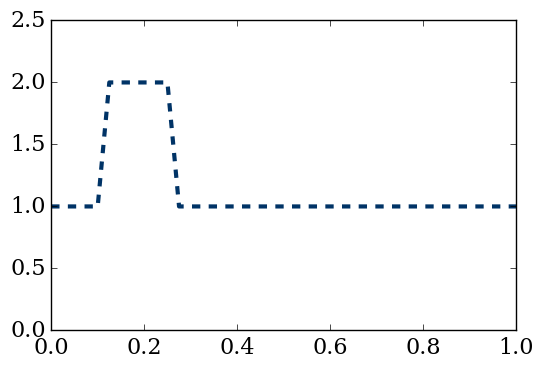

In [31]:
pyplot.plot(x_grid, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

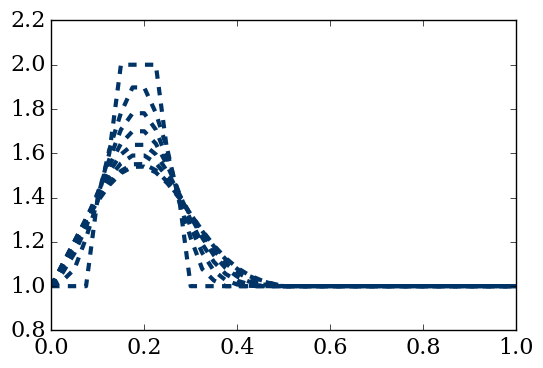

In [32]:
for n in range(N):  
    u0 = u.copy() 
    u[1:-1] = u0[1:-1] + a*dt/dx**2*(u0[2:] -2*u0[1:-1] +u0[0:-2])

    # Set Dirichlet boundary conditions
    u[0] = 1;  u[N] = 1

    if n%3 == 0:
        pyplot.plot(x_grid, u, color='#003366', ls='--', lw=3)
        pyplot.ylim(0,2.5);
        
pyplot.plot(x_grid, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0.8,2.2);

#### Exercise. 
Investigate computationally the threshold $\texttt{sigma}<=0.5$, e.g. 

(a) what happens for $\texttt{sigma}=0.5$

or 

(b) for $\texttt{sigma}>0.5$ ?

We will see later in the lecture how to analyse stability and 
convergence of finite differences schemes.